# Sensor Data Fusion
Lecturer: Prof. Baum \
Tutor: Dr. Kolja Thorman\
Semester: Summer 2024

## Homework 7
Assume a robot in 1D-space at position $x$ moving at time $k$ with velocity $v_k$ forward. The prior of $x$ at time $k=0$ is a Gaussian with $\hat{x}_0=5m$ and $\sigma_{x,0}^2=2m^2$.


---
The following tasks will have missing sections marked that you should fill out. 

Missing code parts are marked by
```
# ... code code code
=== YOUR CODE HERE ===

=== END OF YOUR CODE ===
# ... code code code
```
If you are asked to implement a function, make sure to check what variable will be returned by the function and to fill it accordingly. Do not change code outside of the indicated sections.

Furthermore, some questions require theoretical answers instead of python code.

Such questions will have a field marked like this: 

=== YOUR ANSWER HERE === 

In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv

---
### a)
Draw $x_0$ from the prior. The robot moves $x_{k+1}=x_k+T(v_k+e_v)$ with equidistant time steps $T=1s$ and velocity error $e_v\sim\mathcal{N}(0\frac{m}{s},0.5\big(\frac{m}{s}\big)^2)$. Write a function which moves the robot for one time step with constant input $v_k=1\frac{m}{s}$.

Hint:
- When using `np.random.normal`, you need to pass the standard deviation as the `scale` parameter. Remember how standard deviation and variance (which is given here) are related, and make sure you use `np.sqrt(...)` as necessary!

In [2]:
# def. of variables
x_hat = 5
x_sigma2 = 2
v_hat = 1
ev_sigma2 = 0.5

N = 5
T = 1

In [3]:
# Draw x from the prior

# === YOUR CODE HERE ===

x =  np.random.normal(x_hat, np.sqrt(x_sigma2))

# === END OF YOUR CODE 

In [4]:
def movement(x, T, v_hat, ev_sigma2):
    """
    Function that implements robot movement.
    :param x: robot state
    :param T: time step length
    :param v_hat: robot velocity forward
    :param ev_sigma2: velocity error
    :return: x the updated state after robot movement
    """
    
    # === YOUR CODE HERE ===
    e= np.random.normal(0, np.sqrt(ev_sigma2))
    x = x + T*(v_hat + e)
    # === END OF YOUR CODE ===
    
    return x

---
### b)
In each time step, a sensor measures the robot's position. Implement a measurement equation assuming independent zero-mean Gaussian noise of $e_s\sim\mathcal{N}(0m,0.2m^2)$.

In [5]:
# def of variables
es_sigma2 = 0.2

In [6]:
def sensor_measurement(x, es_sigma2):
    """
    Function that implements the sensor measuring the robot's position.
    :param x: The true position
    :param es_sigma2: measurement noise 
    :return: y the measured robot position
    """
    
    # === YOUR CODE HERE ===
    y= np.random.normal(x, np.sqrt(es_sigma2))

    # === END OF YOUR CODE ===
    
    return y

---
### c)
Now, implement the time update formulas from the lecture to get the next predicted state and variance for a single time step.

In [7]:
def time_update(x_hat, x_sigma2, T, v_hat, ev_sigma2):
    """
    Function that implements a 1D time update for the robot state.
    :param x_hat: state estimate
    :param x_sigma2: state variance
    :param T: time step length
    :param v_hat: robot velocity forward
    :param ev_sigma2: velocity error
    :return: (x_hat, x_sigma2) the updated state and variance
    """
    # === YOUR CODE HERE ===
    
    x_hat = x_hat + T*v_hat
    x_sigma2 = x_sigma2 + T**2 * ev_sigma2
    
    # === END OF YOUR CODE ===
    return x_hat, x_sigma2

---
### d)
Next, implement the measurement update to get the updated state and variance after a measurement was received.

In [8]:
def measurement_update(x_hat, x_sigma2, y, es_sigma2):
    """
    Function that implements the measurement update for the robot state and variance in 1D
    :param x_hat: state estimate
    :param x_sigma2: state variance
    :param y: sensor measurement of the robot position
    :param es_sigma2: measurement noise 
    :return: (x_hat, x_sigma2) the updated state and variance
    """
    # === YOUR CODE HERE ===
    
    alpha = x_sigma2 / (x_sigma2 + es_sigma2)
    x_hat = (1- alpha)*x_hat + alpha*y
    x_sigma2 = (1- alpha)*x_sigma2
    # === END OF YOUR CODE ===
    
    return x_hat, x_sigma2

---
### e)
Finally, in the following code all functions will be put together to run the simulation and create a visualization for it. 

All plotting functions are already implemented, along with the necessary variable definitions. However, you still need to fill out certain small blocks of code that are responsible for generating the initial state of x, and the measurement and time update steps.

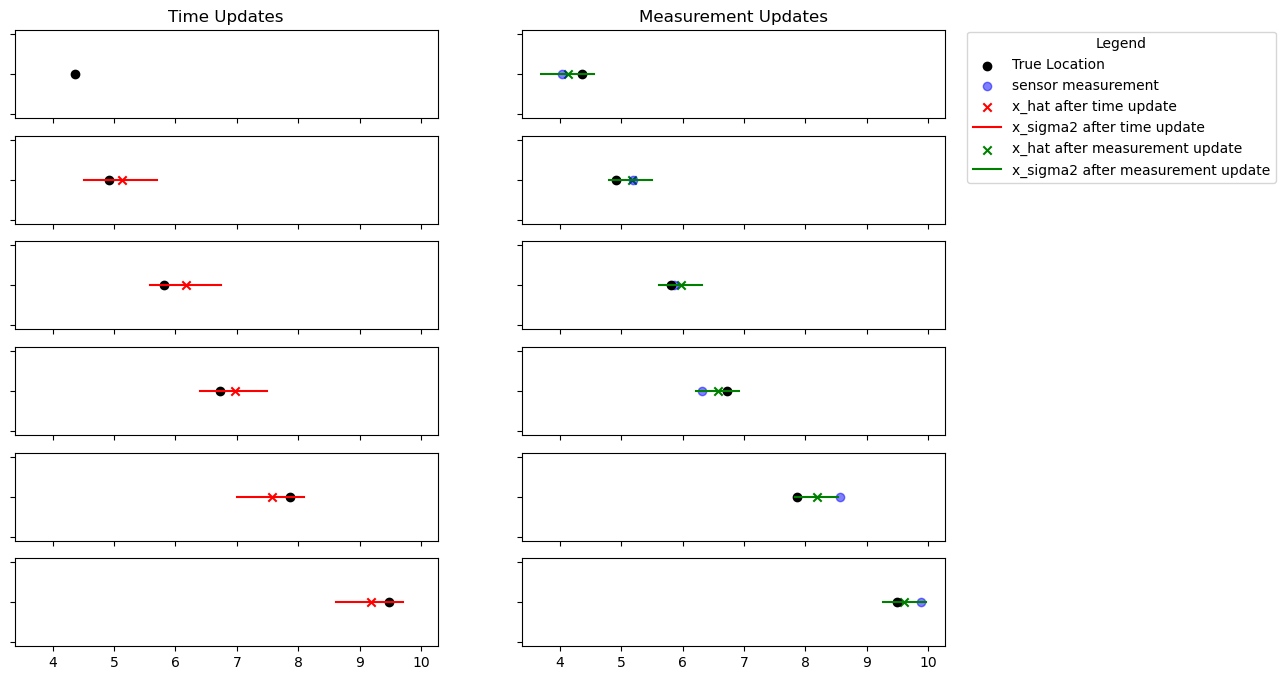

In [9]:
# make sure all variables are correct:
x_hat = 5
x_sigma2 = 2
v_hat = 1
ev_sigma2 = 0.2

N = 5
T = 1

# prepare the plot
fig, ax = plt.subplots(nrows=N+1, ncols=2, sharex='all', sharey='all', figsize=(12,8))
fix_y_axis = 1  # since we have a 1D problem, all plots get a fixed y axis
for a in np.ravel(ax):  
    a.set_yticklabels([])  # remove the y tick labels for all plots, since we only care about the x dim
ax[0,0].set_title("Time Updates")
ax[0,1].set_title("Measurement Updates")

# =======
# Run the functions:

# initial state of x
# === YOUR CODE HERE ===

x = np.random.normal(x_hat, np.sqrt(x_sigma2))

# === END OF YOUR CODE

# plot true location 
p1 = ax[0, 0].scatter(x, fix_y_axis, marker='o', c="k")  
ax[0, 1].scatter(x, fix_y_axis, marker='o', c="k")  

# measurement update
# === YOUR CODE HERE ===

y = sensor_measurement(x, es_sigma2)

x_hat, x_sigma2 = measurement_update(x_hat, x_sigma2, y, es_sigma2)

# === END OF YOUR CODE

# plot 
ax[0, 1].scatter(x_hat, fix_y_axis, marker='x', c='g')  # plot x_hat
ax[0, 1].scatter(y, fix_y_axis, marker='o', c='b', alpha=0.5)  # plot measurement
x_line = np.arange(x_hat-np.sqrt(x_sigma2), x_hat+np.sqrt(x_sigma2), 0.05)  # x_sigma "line"
ax[0, 1].plot(x_line, np.repeat(fix_y_axis, len(x_line)), c='g')  # plot x_sigma

for i in range(N):
    # time update
    # === YOUR CODE HERE ===
    #create a x-sigma plot for the time update
    sigma_list = []
    
    x = movement(x, T, v_hat, ev_sigma2)
    
    x_hat, x_sigma2 = time_update(x_hat, x_sigma2, T, v_hat, ev_sigma2)
    
    
    # === END OF YOUR CODE ===
    
    # add gt
    ax[i+1, 0].plot(x, fix_y_axis, marker='o', c='k')
    ax[i+1, 1].plot(x, fix_y_axis, marker='o', c='k')
    
    # plot 
    p2 = ax[i+1, 0].scatter(x_hat, fix_y_axis, marker='x', c='r')  # plot x_hat
    x_line = np.arange(x_hat-np.sqrt(x_sigma2), x_hat+np.sqrt(x_sigma2), 0.05)  # x_sigma "line"
    p3 = ax[i+1, 0].plot(x_line, np.repeat(fix_y_axis, len(x_line)), c='r')  # plot x_sigma
    
    # measurement update
    # === YOUR CODE HERE ===

    y = sensor_measurement(x, es_sigma2)

    x_hat, x_sigma2 = measurement_update(x_hat, x_sigma2, y, es_sigma2)

    # === END OF YOUR CODE
    
    # plot 
    p4 = ax[i+1, 1].scatter(x_hat, fix_y_axis, marker='x', c='g')  # plot x_hat
    p5 = ax[i+1, 1].scatter(y, fix_y_axis, marker='o', c='b', alpha=0.5)  # plot measurement
    x_line = np.arange(x_hat-np.sqrt(x_sigma2), x_hat+np.sqrt(x_sigma2), 0.05)  # x_sigma "line"
    p6 = ax[i+1, 1].plot(x_line, np.repeat(fix_y_axis, len(x_line)), c='g')  # plot x_sigma

# finish plot
plot_labels=["True Location", "sensor measurement", "x_hat after time update", "x_sigma2 after time update", 
            "x_hat after measurement update", "x_sigma2 after measurement update"]
ax[0, 1].legend([p1, p5, p2, p3[0], p4 , p6[0]],  # p3 and p6 are arrays with 1 entry, so take [0] to prevent errors
                plot_labels,
                loc="upper left",
                borderaxespad=0.1,    
                title="Legend",
                bbox_to_anchor=(1.05, 1))
plt.show()